In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

businesses = pd.read_json('/Users/dunyenghuh/Desktop/Kaggle/yelp_regression_project/yelp_business.json',lines=True)
reviews = pd.read_json('/Users/dunyenghuh/Desktop/Kaggle/yelp_regression_project/yelp_review.json',lines=True)
users = pd.read_json('/Users/dunyenghuh/Desktop/Kaggle/yelp_regression_project/yelp_user.json',lines=True)
checkins = pd.read_json('/Users/dunyenghuh/Desktop/Kaggle/yelp_regression_project/yelp_checkin.json',lines=True)
tips = pd.read_json('/Users/dunyenghuh/Desktop/Kaggle/yelp_regression_project/yelp_tip.json',lines=True)
photos = pd.read_json('/Users/dunyenghuh/Desktop/Kaggle/yelp_regression_project/yelp_photo.json',lines=True)

In [3]:
y = businesses['stars']
print(businesses.shape)
businesses.head()


(188593, 22)


,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,...,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",...,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",...,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",...,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,...,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",...,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [4]:
print(reviews.shape)
reviews.head()

(188593, 7)


,average_review_age,average_review_length,average_review_sentiment,business_id,number_cool_votes,number_funny_votes,number_useful_votes
0,524.458333,466.208333,0.808638,--1UhMGODdWsrMastO9DZw,16,1,15
1,1199.589744,785.205128,0.669126,--6MefnULPED_I942VcFNA,32,27,53
2,717.851852,536.592593,0.820837,--7zmmkVg-IMGaXbuVd0SQ,52,29,81
3,751.750000,478.250000,0.170925,--8LPVSo5i0Oo61X01sV9A,0,0,9
4,978.727273,436.181818,0.562264,--9QQLMTbFzLJ_oT-ON3Xw,4,3,7


In [5]:
print(users.shape)
users.head()

(188593, 6)


,average_days_on_yelp,average_number_fans,average_number_friends,average_number_years_elite,average_review_count,business_id
0,1789.750000,1.833333,18.791667,0.833333,57.541667,--1UhMGODdWsrMastO9DZw
1,2039.948718,49.256410,214.564103,1.769231,332.743590,--6MefnULPED_I942VcFNA
2,1992.796296,19.222222,126.185185,1.814815,208.962963,--7zmmkVg-IMGaXbuVd0SQ
3,2095.750000,0.500000,25.250000,0.000000,7.500000,--8LPVSo5i0Oo61X01sV9A
4,1804.636364,1.000000,52.454545,0.090909,34.636364,--9QQLMTbFzLJ_oT-ON3Xw


In [6]:
print(checkins.shape)
checkins.head()

(157075, 4)


,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23...",1,4


In [7]:

print(tips.shape)
tips.head()

(121526, 3)


,average_tip_length,business_id,number_tips
0,79.000000,--1UhMGODdWsrMastO9DZw,1
1,49.857143,--6MefnULPED_I942VcFNA,14
2,52.500000,--7zmmkVg-IMGaXbuVd0SQ,10
3,136.500000,--9QQLMTbFzLJ_oT-ON3Xw,2
4,68.064935,--9e1ONYQuAa-CB_Rrw7Tw,154


In [8]:

print(photos.shape)
photos.head()

(32976, 3)


,average_caption_length,business_id,number_pics
0,0.000000,--1UhMGODdWsrMastO9DZw,1
1,67.500000,--6MefnULPED_I942VcFNA,2
2,30.426471,--9e1ONYQuAa-CB_Rrw7Tw,136
3,0.000000,--DaPTJW3-tB1vP-PfdTEg,1
4,5.500000,--FBCX-N37CMYDfs790Bnw,4


In [9]:
df = pd.merge(businesses, users, how='left', on='business_id')
df = pd.merge(df, reviews, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

print(df.shape)
df.head()

(188593, 40)


,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,...,number_cool_votes,number_funny_votes,number_useful_votes,time,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",...,5,6,13,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': ...",11.0,18.0,38.0,6.0,NaN,NaN
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",...,1,0,1,{'Sun-1': 1},0.0,1.0,66.0,1.0,29.0,1.0
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",...,2,0,1,"{'Mon-0': 1, 'Sun-0': 1, 'Fri-1': 1, 'Sun-1': ...",2.0,5.0,32.0,1.0,NaN,NaN
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,...,0,1,3,{'Wed-18': 1},1.0,0.0,NaN,NaN,NaN,NaN
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",...,0,0,4,"{'Thu-14': 1, 'Thu-20': 1}",2.0,0.0,NaN,NaN,NaN,NaN


## Exploratory Analysis 

In [10]:
df.corr().stars.sort_values()

average_review_length        -0.277081
average_review_age           -0.125645
latitude                     -0.093234
longitude                    -0.082398
average_review_count         -0.066572
average_number_years_elite   -0.064419
price_range                  -0.052565
alcohol?                     -0.043332
average_tip_length           -0.043203
has_wifi                     -0.039857
average_days_on_yelp         -0.038061
average_number_fans          -0.031141
good_for_kids                -0.030382
take_reservations            -0.024486
average_number_friends       -0.007629
number_useful_votes          -0.000066
number_funny_votes            0.001320
weekday_checkins              0.007972
weekend_checkins              0.012630
number_tips                   0.031368
review_count                  0.032413
takes_credit_cards            0.037748
number_cool_votes             0.043375
is_open                       0.051913
number_pics                   0.053011
has_bike_parking         

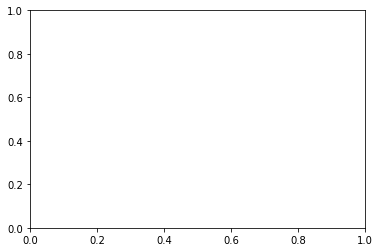

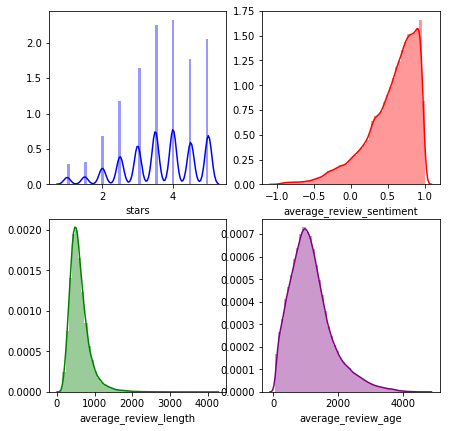

In [11]:
plt.subplot()

f, axes = plt.subplots(2, 2, figsize = (7,7) )
sns.distplot(df.stars, color="b", ax= axes[0,0])
sns.distplot(df.average_review_sentiment, color='r', ax=axes[0,1])
sns.distplot(df.average_review_length, color='g', ax=axes[1,0])
sns.distplot(df.average_review_age, color='purple', ax=axes[1,1])

In [43]:
data.average_review_sentiment

0         0.865342
1         0.975000
2         0.301240
3        -0.060500
4         0.372550
5         0.676090
6         0.859314
7         0.221543
8         0.216510
9         0.820267
10       -0.104308
11        0.818395
12        0.733046
13        0.718700
14        0.930733
15        0.117200
16        0.653433
17        0.429975
18       -0.562200
19        0.363233
20        0.922265
21        0.119900
22        0.319333
23        0.855739
24        0.271243
25       -0.039667
26       -0.565950
27        0.696356
28       -0.362900
29        0.277564
            ...   
188563    0.529154
188564    0.254083
188565    0.774589
188566    0.667476
188567    0.371814
188568    0.562072
188569    0.885869
188570    0.869287
188571    0.499760
188572    0.852840
188573    0.835141
188574    0.593300
188575    0.400233
188576    0.885533
188577    0.788839
188578    0.966500
188579   -0.486000
188580    0.674800
188581    0.774372
188582    0.669689
188583    0.686515
188584    0.

In [12]:
data = df.copy()
data = data.drop(columns=['number_useful_votes','number_funny_votes','weekday_checkins','weekend_checkins','average_number_friends','take_reservations'])
data.shape

(188593, 34)

## Dealing with missing data 
 

In [13]:
# missing data - percentage of missing data in each columns
df_na = (data.isnull().sum() / len(data)) * 100
df_na = df_na.drop(df_na[df_na ==0].index).sort_values(ascending=False)
df_na
#data.isnull().sum()
#print("No Missing Data")

number_pics               82.514727
average_caption_length    82.514727
number_tips               35.561765
average_tip_length        35.561765
hours                     23.755919
time                      16.712179
attributes                13.672830
categories                 0.286861
longitude                  0.003181
latitude                   0.003181
dtype: float64

In [14]:

#data['attributes'] - delete : diffcult to make numeric 
#data['categories'] - delete : diffcult to make numeric 
#data['time'] - delete : diffcult to make numeric 
#data['hours'] - delete : diffcult to make numeric 
data['average_tip_length'] #- convert NaN to 0 
data['number_tips'] #- convert NaN to 0
data['average_caption_length'] #- convert NaN to 0
data['number_pics'] # - convert NaN to 0 
data['longitude'].isnull().sum() # - 6 datapoints missing. impute 0 or mean 

data = data.drop(columns=['time','categories','attributes','hours'])


In [15]:
# all_data['Embarked'] = all_data['Embarked'].map( {'S':2,'C': 1, 'Q': 0} ).astype(int)

data = data.fillna(0)
df_na
print("No Missing Data")

No Missing Data


In [16]:
data.columns

# address and postal code is redundant
# business id unnecessary
# df['city'].value_counts() - lets investigate further
#df['name', neighborhood] - delete


categorical_cols = [col for col in data.columns if data[col].dtype == "object"]
numerical_cols = [col for col in data.columns if data[col].dtype != "object"]
#data[categorical_cols] -> all delete except for city and state. Need further research

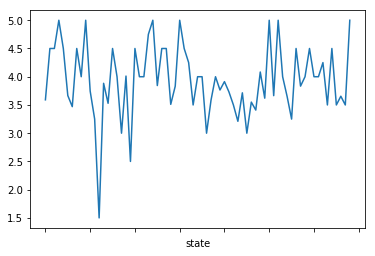

AZ     56495
NV     35688
ON     32393
NC     14359
OH     13664
PA     10966
QC      8756
AB      7670
WI      5042
IL      1937
SC       770
NYK      163
NI       134
IN       101
OR        72
BY        60
ST        45
CO        43
C         34
HE        32
NLK       23
XGM       23
NY        19
RP        19
01        11
CA         8
VS         7
NW         4
O          3
6          3
       ...  
SG         2
LU         1
TAM        1
CS         1
MA         1
MT         1
FL         1
MN         1
11         1
CRF        1
AG         1
V          1
BC         1
XMS        1
HH         1
CC         1
4          1
GA         1
WHT        1
45         1
KY         1
DE         1
10         1
NE         1
PO         1
HU         1
SP         1
WAR        1
RCC        1
VA         1
Name: state, Length: 69, dtype: int64

In [17]:
#Are the stars impacted by the city/state where restaurant is located at?

stars_by_state = data.groupby('state').stars
stars_by_city = data.groupby('city').stars

stars_by_state.mean().plot()
plt.show()
data.state.value_counts()

#State might matter. Let's include State in our approach - this would be our one and only categorical variable 

In [18]:
state = data['state']
data = data.drop(columns = categorical_cols)
data.head()


,alcohol?,good_for_kids,has_bike_parking,has_wifi,is_open,latitude,longitude,price_range,review_count,stars,...,average_number_years_elite,average_review_count,average_review_age,average_review_length,average_review_sentiment,number_cool_votes,average_tip_length,number_tips,average_caption_length,number_pics
0,0,1,0,0,1,51.091813,-114.031675,2,24,4.0,...,1.125000,114.875000,618.250000,532.916667,0.865342,5,38.0,6.0,0.0,0.0
1,0,1,0,0,0,35.960734,-114.939821,2,3,4.5,...,0.666667,19.666667,371.666667,481.333333,0.975000,1,66.0,1.0,29.0,1.0
2,1,1,1,1,0,45.540503,-73.599300,2,5,4.0,...,0.600000,24.600000,1106.200000,252.000000,0.301240,2,32.0,1.0,0.0,0.0
3,0,0,0,0,1,33.449999,-112.076979,0,8,1.5,...,0.250000,68.000000,398.500000,672.625000,-0.060500,0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,51.035591,-114.027366,0,4,2.0,...,4.250000,528.250000,1412.750000,1015.500000,0.372550,0,0.0,0.0,0.0,0.0


In [19]:
data.corr().stars.sort_values()

average_review_length        -0.277081
average_review_age           -0.125645
latitude                     -0.093255
longitude                    -0.082265
average_review_count         -0.066572
average_number_years_elite   -0.064419
average_tip_length           -0.052899
price_range                  -0.052565
alcohol?                     -0.043332
has_wifi                     -0.039857
average_days_on_yelp         -0.038061
average_number_fans          -0.031141
good_for_kids                -0.030382
average_caption_length        0.000040
number_pics                   0.001727
number_tips                   0.014038
review_count                  0.032413
takes_credit_cards            0.037748
number_cool_votes             0.043375
is_open                       0.051913
has_bike_parking              0.068084
average_review_sentiment      0.782187
stars                         1.000000
Name: stars, dtype: float64

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

label = LabelEncoder()
label_state = pd.DataFrame(label.fit_transform(state))
label_state.head()

OH_state = pd.DataFrame(OH_encoder.fit_transform(label_state))


OH_state.index =  state.index
OH_state.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
all_data = pd.concat([data,OH_state], axis=1)
all_data = all_data.drop(columns = ['average_caption_length','number_pics','number_tips','longitude','latitude','stars'])


all_data.head()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,is_open,price_range,review_count,takes_credit_cards,average_days_on_yelp,average_number_fans,...,59,60,61,62,63,64,65,66,67,68
0,0,1,0,0,1,2,24,1,1809.375000,5.375000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,2,3,1,970.333333,2.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,0,2,5,0,1499.600000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,8,0,1626.500000,2.375000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,4,1,2570.000000,26.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Regression 

In [32]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(all_data)
    rmse= np.sqrt(-cross_val_score(model, all_data, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [33]:
lasso = make_pipeline(Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.5649 (0.0034)



In [34]:
ENet = make_pipeline(ElasticNet(alpha =0.0005, random_state=1))
score = rmsle_cv(ENet)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ENet score: 0.5641 (0.0029)



In [35]:
BayRidge = make_pipeline(BayesianRidge( ))
score = rmsle_cv(BayRidge)
print("\nBayridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Bayridge score: 0.5587 (0.0020)



In [36]:
LarsIC = make_pipeline(LassoLarsIC())
score = rmsle_cv(LarsIC)
print("\nLarsIC score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LarsIC score: 0.5589 (0.0020)



In [37]:
RandFor = make_pipeline(RandomForestRegressor())
score = rmsle_cv(RandFor)
print("\nRandFor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RandFor score: 0.5613 (0.0035)



In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [23]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KeyboardInterrupt: 